In [2]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 243.2 kB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 241.0 kB/s eta 0:00:00m eta 0:00:010:00:04
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 211.7 kB/s eta 0:00:000:00:010:00:01:01
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist.data, mnist.target
# mnist_df = pd.DataFrame(X)
# mnist_df['label'] = y

# # Save to CSV
# mnist_df.to_csv('mnist_dataset.csv', index=False)
# # Function to perform PCA

In [3]:

def pca(X, num_components):
    # Standardize the data
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        print("Data contains NaN or Inf.")

    X_standardized = (X - np.mean(X, axis=0)) / (np.std(X, axis=0) + 1e-10)
    if np.any(np.isnan(X_standardized)):
        print("Standardized data contains NaN.")
    # Compute the covariance matrix
    covariance_matrix = np.cov(X_standardized, rowvar=False)
    if np.any(np.isnan(covariance_matrix)):
        print("Covariance matrix contains NaN.")

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort the eigenvectors by decreasing eigenvalues
    idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, idx]

    # Select the top 'num_components' eigenvectors
    principal_components = eigenvectors[:, :num_components]

    # Project the data onto principal components
    X_pca = np.dot(X_standardized, principal_components)

    return X_pca

In [4]:
# Applying PCA to the MNIST dataset
num_components = 2  # Number of components to keep
mnist_pca = pca(X, num_components)

print(mnist_pca.shape)  # The transformed dataset shape
# Convert labels to integers for color mapping
y_int = y.astype(int)

(70000, 2)


In [5]:
mnist_pca[:, 0]

array([-0.89171985,  8.81353003,  2.20483541, ..., -5.22259497,
       -2.17772858, 11.77787167])

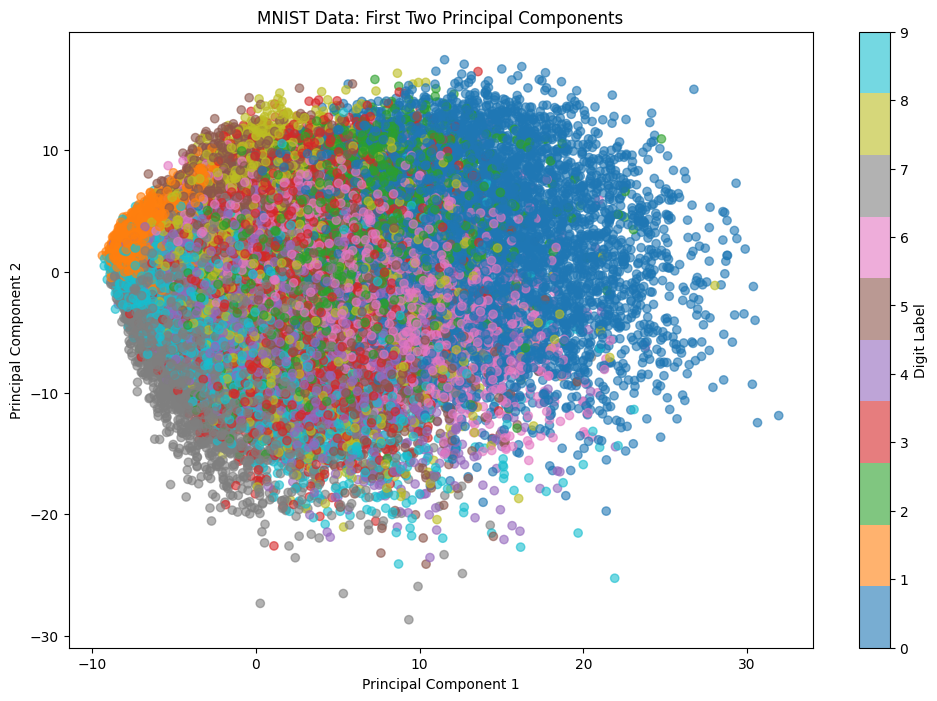

In [6]:
# Plotting
plt.figure(figsize=(12, 8))
scatter = plt.scatter(mnist_pca[:, 0], mnist_pca[:, 1], c=y_int, cmap='tab10', alpha=0.6)
plt.title('MNIST Data: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Digit Label')
plt.show()

In [7]:
X[:100]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.manifold import Isomap
m = 1000
# Assuming 'X' is your MNIST data
isomap = Isomap(n_components=3,  n_neighbors=5, n_jobs=-1)  # You can adjust the number of components
X_isomap = isomap.fit_transform(X[:m])


In [9]:
# Reuse the PCA function defined earlier
mnist_pca_after_isomap = pca(X_isomap, num_components=3)


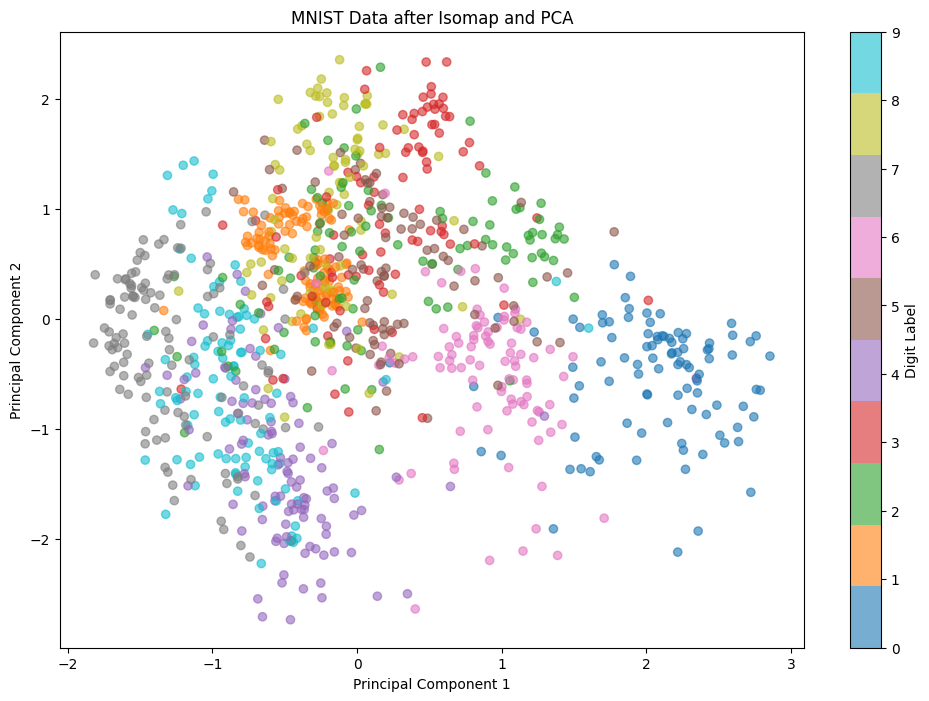

In [10]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(mnist_pca_after_isomap[:, 0], mnist_pca_after_isomap[:, 1], c=y[:m].astype(int), cmap='tab10', alpha=0.6)
plt.title('MNIST Data after Isomap and PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Digit Label')
plt.show()


In [15]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt
# Assuming mnist_pca_after_isomap is your 3-component Isomap data
# and y contains the labels

# Create a 3D plot
plt.figure(figsize=(12, 8))
ax = plt.subplot(111, projection='3d')

# Scatter plot for the first three components
scatter = ax.scatter(mnist_pca_after_isomap[:, 0], mnist_pca_after_isomap[:, 1], mnist_pca_after_isomap[:, 2], 
                     c=y[:m].astype(int), cmap='tab10', alpha=0.6)

# Labels and title
ax.set_title('MNIST Data: First Three Components after Isomap')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Color bar
plt.colorbar(scatter, ax=ax, label='Digit Label')

# Show the plot
plt.show()
